# 2D, non-animated, random


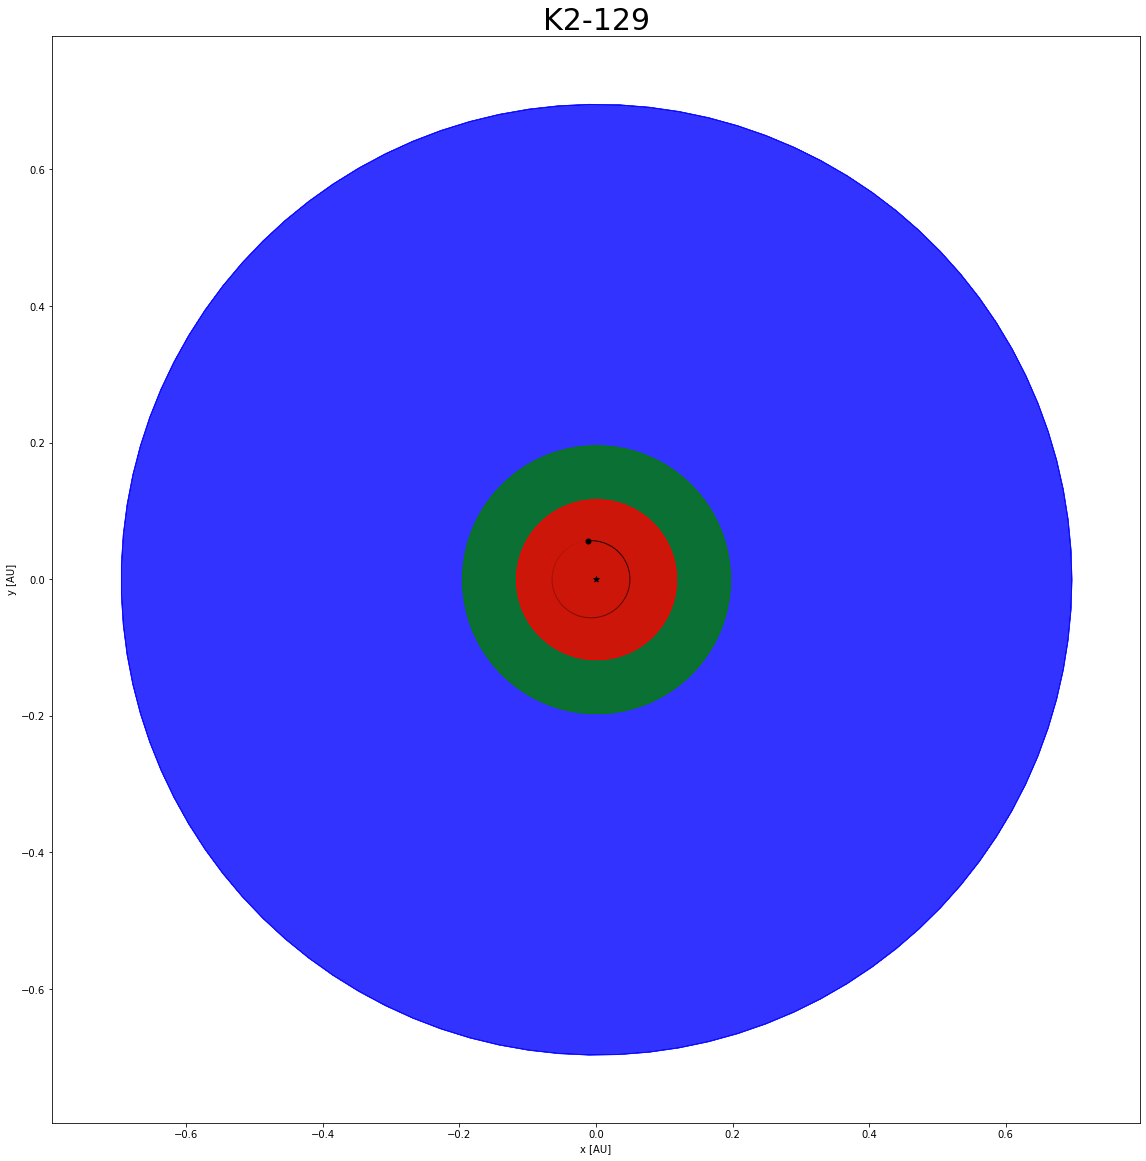

In [ ]:
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random 
import pandas as pd
from random import sample
import rebound

# Setting up dataframe
exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18) 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # Changing nan to 1 for eaiser indexing
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(4920) # Changing nan to 4920 K for eaiser indexing
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(50) # Changing nan to 50 days for eaiser indexing
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.5) # Changing nan to 0 for eaiser indexing
exoplanetdata = exoplanetdata.set_index('pl_hostname') 

class generator():
    '''This class is designed to generate the habitable zones diagram for each star system'''

    def __init__(self):
        '''Initializing object by star name'''
        Star_name = exoplanetdata.sample(1)
        Star_name = Star_name.index[0]
        self.Kepler_star_data = exoplanetdata.loc[[Star_name]]
        self.Star_name = Star_name
    
    def analysis(self):
                
        # Star Luminosity - Better way to do this??/ maybe not with current dataframe
        # if originally no exact luminosity is presented in data seat, we can make a good estimate with L = R^2*T^4
        Star_Luminosity = []

        if self.Kepler_star_data['st_lum'].iloc[0] == 0: 
            Star_Luminosity.append((self.Kepler_star_data['st_rad'].iloc[0]**2)*((self.Kepler_star_data['st_teff'].iloc[0]/5778)**4))

        else:
            Star_Luminosity.append(10**(self.Kepler_star_data['st_lum'].iloc[0])) 

        Star_Luminosity = str(Star_Luminosity)
        Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
        Star_Luminosity = round(float(Star_Luminosity),3)
        print(self.Star_name,'has a luminosity of',Star_Luminosity, 'Solar units')
        
        self.Star_Luminosity = Star_Luminosity

        # star size (plot units; to show relative size of stars)
        Star_size = []

        if self.Kepler_star_data['st_rad'].iloc[0] >= 0 and self.Kepler_star_data['st_rad'].iloc[0] <= 1:
            Star_size.append(0.05)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 1 and self.Kepler_star_data['st_rad'].iloc[0] <= 2:
            Star_size.append(0.15)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 2 and self.Kepler_star_data['st_rad'].iloc[0] <= 5:
            Star_size.append(0.25)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 5 and self.Kepler_star_data['st_rad'].iloc[0] <= 10:
            Star_size.append(0.35)
        elif self.Kepler_star_data['st_rad'].iloc[0] > 10:
            Star_size.append(0.45)

        Star_size = str(Star_size)
        Star_size =  Star_size.strip('[').strip(']')
        Star_size = float(Star_size)
        print('Star size is', self.Kepler_star_data['st_rad'].iloc[0],'Solar units')
        print('Star size is',Star_size,'map units')
        self.Star_size = Star_size
        
        # Number of exoplanets - not needed for now
        number_exo = self.Kepler_star_data['pl_pnum'].iloc[0]

        # Exoplanet's semi-major axes
        planet_axes_list = []
        for i in range(len(self.Kepler_star_data['pl_orbsmax'])):
            if self.Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
                axis = (((((self.Kepler_star_data['pl_orbper'].iloc[i]*86400)**2)*(6.67E-11)*(self.Kepler_star_data['st_mass'].iloc[i]*2E+30 + self.Kepler_star_data['pl_bmassj'].iloc[i]*1.898E+27))/(4*np.pi**2))**(1/3))/1.496E+11
                planet_axes_list.append(round(axis,3)) 

            else:
                planet_axes_list.append(round(self.Kepler_star_data['pl_orbsmax'].iloc[i],3))
        planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))
        
        self.planet_axes_list = planet_axes_list


        # Habitable zone function
        # Limits 0.9 and 1.5 are sourced from britannica.com (https://www.britannica.com/science/habitable-zone)
        def habit_zone(L):
            # L input is given star's luminosity (in Solar units)
            Lsun = 1.0 # Luminosity of Sun (in Solar units)
            d_inner = round(0.9*(np.sqrt(L/Lsun)),3)
            #print('Inner limit is',d_inner,'AU')
            d_outer = round(1.5*(np.sqrt(L/Lsun)),3)
            #print('Outer limit is',d_outer,'AU')

            return d_inner, d_outer    
        
        inner_limit = habit_zone(self.Star_Luminosity)[0]
        outer_limit = habit_zone(self.Star_Luminosity)[1]
        
        self.inner_limit = inner_limit
        self.outer_limit = outer_limit
        print('The inner limit is',inner_limit,' AU; the outer limit is', outer_limit, 'AU')

        # Creating data labels
        planet_index = ['b','c','d','e','f','g','h','i','j','k']
        planet_index_rows = []
        for i in range(len(planet_axes_list)):
            index = self.Star_name + planet_index[i]
            planet_index_rows.append(index)
        
        self.planet_index_rows = planet_index_rows
        # Eccentricity
        Eccen = []
        for i in range(len(planet_axes_list)):
            Eccen.append(self.Kepler_star_data['pl_orbeccen'].iloc[i])
        
        self.Eccen = Eccen
        
        print('The eccentricity of the orbits:', Eccen)

        semi_minor = []
        for i in range(len(planet_axes_list)):
            semi_minor.append(round(planet_axes_list[i]*np.sqrt(1-Eccen[i]),3))
        
        self.semi_minor = semi_minor
        
        Planet_temp = []
        A = 0.3 # albedo
        for i in planet_axes_list:
            planet_temp = self.Kepler_star_data['st_teff'].iloc[0]*((self.Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
            Planet_temp.append(round(planet_temp,2))
        
        self.Planet_temp = Planet_temp
        
        # If planet is within 0 and 100 Celsius and within the 'green' zone
        
        Yes_No_list = []
        for i in range(len(Planet_temp)):
            if Planet_temp[i] >= 273 and Planet_temp[i] <= 373 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Yes = 'Yes'
                Yes_No_list.append(Yes)
            elif Planet_temp[i] >= 200 and Planet_temp[i] <=450 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Maybe = 'Likely'
                Yes_No_list.append(Maybe)
            else:
                No = 'No'
                Yes_No_list.append(No)
        
        self.Yes_No_list = Yes_No_list
        
        Yes_No_list_Zone = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Yes = 'Yes'
                Yes_No_list_Zone.append(Yes)
            elif planet_axes_list[i] <= inner_limit or planet_axes_list[i] >= outer_limit:
                No = 'No'
                Yes_No_list_Zone.append(No)
        
        self.Yes_No_list_Zone = Yes_No_list_Zone
        
        Jupiter_list = []
        for i in range(len(planet_axes_list)):
            if self.Kepler_star_data['pl_radj'].iloc[i] < 0.5:
                Smaller = 'Smaller'
                Jupiter_list.append(Smaller)
            elif self.Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and self.Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                Yes = 'Yes'
                Jupiter_list.append(Yes)
            elif self.Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                Larger = 'Larger'
                Jupiter_list.append(Larger)
        
        self.Jupiter_list = Jupiter_list
    
        
    def plotting(self):
                
        
        # ZONE HABITABILITY (Blue, Green, Red)

        theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

        x_red = self.inner_limit*np.cos(theta) # Red zone
        y_red = self.inner_limit*np.sin(theta)

        x_green = self.outer_limit*np.cos(theta) # Green zone
        y_green = self.outer_limit*np.sin(theta)

        x_blue = (self.outer_limit+0.5)*np.cos(theta) # Blue zone
        y_blue = (self.outer_limit+0.5)*np.sin(theta) 

        xsun = (self.Star_size)*np.cos(theta) # Sun 
        ysun = (self.Star_size)*np.sin(theta)

        # PLOTTING


        print('The exoplanets inlcude', self.planet_index_rows)
        Habitability = pd.DataFrame(data = list(zip(self.Planet_temp,self.Jupiter_list,self.Yes_No_list_Zone,self.Yes_No_list)),index = self.planet_index_rows, columns = ['Surface Temperature (K)','Jupyter-like?', 'Within Habitable Zone?','Habitable?'])
        

        # rebound pkge (https://rebound.readthedocs.io/en/latest/_modules/rebound/particle.html)
        
        sim = rebound.Simulation() 
        sim.add(m = self.Kepler_star_data['st_mass'].iloc[0]) # added star

        for i in range(len(self.planet_axes_list)):
    
            sim.add(m = self.Kepler_star_data['pl_bmassj'].iloc[i]*0.0009543, e = self.Eccen[i], a = self.planet_axes_list[i])

        %matplotlib inline

        from IPython.display import display, clear_output
        import matplotlib.pyplot as plt
        sim.move_to_com()
        for i in range(100):
            sim.integrate(sim.t+0.0005)
            fig, ax = rebound.OrbitPlot(sim,color=False,unitlabel="[AU]", figsize = (20,20))
            ax.set_xlim(-self.outer_limit-0.6, self.outer_limit+0.6) 
            ax.set_ylim(-self.outer_limit-0.6, self.outer_limit+0.6) 
            ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
            ax.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
            ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
            
            #ax.legend(self.planet_axes_list, labels=self.planet_index_rows, title="Semi-major axis (AU); Semi-minor axis (AU)",prop={'size': 15})
            ax.set_title(self.Star_name, fontsize=30)
            display(fig)
            plt.close(fig)
            clear_output(wait=True)
        
        display(Habitability)

    
# ------------------------------------------------------------------------------------------------------------------



# example
example = generator()
example.analysis()
example.plotting()

